### Análisis de la correlación

In [82]:
### Importar las librerías
import pandas as pd
import numpy as np
import openpyxl
import xlrd

### DATOS CONCENTRACIÓN

In [83]:
df_concentr = pd.read_excel("./Dosimetria_Concentracion/DosimetriaPasiva_coordenadas_2021.xlsx",sheet_name = [0,1])

In [84]:
df_concentr[0]

,Número,PUNTOS DE MUESTREO,Caracterización,DÍA COLOCACIÓN,DÍA RECOGIDA,MES,NO2
0,701,Pont de Fusta,Cruce,2021-02-05,2021-02-19,"""Febrero 21",31.41
1,702,Torres de Serrano,Cruce,2021-02-05,2021-02-19,"""Febrero 21",36.78
2,5,Plaza de Tetuán,Plaza rotonda,2021-02-05,2021-02-19,"""Febrero 21",37.03
3,55,Plaza Alfonso Magnánimo,Plaza rotonda,2021-02-05,2021-02-19,"""Febrero 21",29.69
4,53,c/ de la Paz - c/ de la Creu Nova,Cruce,2021-02-05,2021-02-19,"""Febrero 21",36.25
...,...,...,...,...,...,...,...
421,906,Avinguda (Av. Santa Maria-C.Rey don Jaime-C.To...,Cruce,2021-11-12,2021-11-29,"""Noviembre 21",25.21
422,907,Institut (C.Aragon),Cruce,2021-11-12,2021-11-29,"""Noviembre 21",23.44
423,908,"Carretera_BCN (Av. de la Senyera, 20)",Cruce,2021-11-12,2021-11-29,"""Noviembre 21",30.80
424,909,Poligono (c/ Llanternes),Cruce,2021-11-12,2021-11-29,"""Noviembre 21",32.14


In [85]:
#Prueba, obtener la zona 808
datos_z1 = df_concentr[0][df_concentr[0]["Número"] == 808]
datos_z1

,Número,PUNTOS DE MUESTREO,Caracterización,DÍA COLOCACIÓN,DÍA RECOGIDA,MES,NO2
95,808,Parc del Molí,Zona Pacificada,2021-02-05,2021-02-19,"""Febrero 21",17.60
199,808,Parc del Molí,Zona Pacificada,2021-05-07,2021-05-21,"""Mayo 21",14.03
303,808,Parc del Molí,Zona Pacificada,2021-08-12,2021-08-26,"""Agosto 21",12.72
407,808,Parc del Molí,Zona Pacificada,2021-11-12,2021-11-26,"""Noviembre 21",22.87


In [86]:
df_concentr[1][df_concentr[1]["Número"] == 808]

,Número,PUNTOS DE MUESTREO,Coordenadas
103,808,Parc del Molí,"39.51698, -0.40673"


In [87]:
coordenadas_z1 = df_concentr[1][df_concentr[1]["Número"] == 808]["Coordenadas"].item()
coordenadas_z1

'39.51698, -0.40673'

In [88]:
datos_z1 = datos_z1.assign(Coordenadas=coordenadas_z1)
datos_z1

,Número,PUNTOS DE MUESTREO,Caracterización,DÍA COLOCACIÓN,DÍA RECOGIDA,MES,NO2,Coordenadas
95,808,Parc del Molí,Zona Pacificada,2021-02-05,2021-02-19,"""Febrero 21",17.60,"39.51698, -0.40673"
199,808,Parc del Molí,Zona Pacificada,2021-05-07,2021-05-21,"""Mayo 21",14.03,"39.51698, -0.40673"
303,808,Parc del Molí,Zona Pacificada,2021-08-12,2021-08-26,"""Agosto 21",12.72,"39.51698, -0.40673"
407,808,Parc del Molí,Zona Pacificada,2021-11-12,2021-11-26,"""Noviembre 21",22.87,"39.51698, -0.40673"


In [89]:
datos_z1["NO2_media"] = datos_z1["NO2"].mean(axis=0)
datos_z1

,Número,PUNTOS DE MUESTREO,Caracterización,DÍA COLOCACIÓN,DÍA RECOGIDA,MES,NO2,Coordenadas,NO2_media
95,808,Parc del Molí,Zona Pacificada,2021-02-05,2021-02-19,"""Febrero 21",17.60,"39.51698, -0.40673",16.805
199,808,Parc del Molí,Zona Pacificada,2021-05-07,2021-05-21,"""Mayo 21",14.03,"39.51698, -0.40673",16.805
303,808,Parc del Molí,Zona Pacificada,2021-08-12,2021-08-26,"""Agosto 21",12.72,"39.51698, -0.40673",16.805
407,808,Parc del Molí,Zona Pacificada,2021-11-12,2021-11-26,"""Noviembre 21",22.87,"39.51698, -0.40673",16.805


In [90]:

df_concentr_result = pd.DataFrame({
    "Número": [],
    "PUNTOS DE MUESTREO": [],
    "Coordenadas": [],
    "NO2_media": []})
for num in df_concentr[1]["Número"]:
    datos_num = df_concentr[0][df_concentr[0]["Número"] == num]
    coordenadas_num = df_concentr[1][df_concentr[1]["Número"] == num]["Coordenadas"].item()
    if len(datos_num) == 4:
        media_num = datos_num["NO2"].mean(axis=0)
        new_row = {"Número": num, "PUNTOS DE MUESTREO": datos_num.iloc[0]["PUNTOS DE MUESTREO"], "Coordenadas": coordenadas_num, "NO2_media": media_num}
        df_concentr_result = df_concentr_result.append(new_row, ignore_index=True)
    else:
        #media_num = datos_num["NO2"].item()
        #medias[num] = media_num
        #print("media_num_error ", media_num)
        print("ERROR en ubicacion {}, no hay 4 datos/meses, hay {} datos".format(num, len(datos_num)))

ERROR en ubicacion 901, no hay 4 datos/meses, hay 1 datos
ERROR en ubicacion 902, no hay 4 datos/meses, hay 1 datos
ERROR en ubicacion 903, no hay 4 datos/meses, hay 1 datos
ERROR en ubicacion 904, no hay 4 datos/meses, hay 1 datos
ERROR en ubicacion 905, no hay 4 datos/meses, hay 1 datos
ERROR en ubicacion 906, no hay 4 datos/meses, hay 1 datos
ERROR en ubicacion 907, no hay 4 datos/meses, hay 1 datos
ERROR en ubicacion 908, no hay 4 datos/meses, hay 1 datos
ERROR en ubicacion 909, no hay 4 datos/meses, hay 1 datos
ERROR en ubicacion 910, no hay 4 datos/meses, hay 1 datos


In [91]:
df_concentr_result

,Número,PUNTOS DE MUESTREO,Coordenadas,NO2_media
0,1.0,Xátiva - San Vicente,"39.468167 , -0.379714",45.7800
1,2.0,Plaza del Ayuntamiento,"39.469404 , -0.376665",34.6750
2,3.0,Túnel plaza España,"39.460398 , -0.378253",70.3325
3,4.0,Plaza de la Reina,"39.474550 , -0.375630",27.3850
4,5.0,Plaza de Tetuán,"39.474265 , -0.369902",40.7825
...,...,...,...,...
99,804.0,c/ El Clot (final calle),"39.52362, -0.4177",15.9325
100,805.0,Plaza Comunidad Valenciana,"39.51952, -0.41394",31.5675
101,806.0,c/ Major 63,"39.51896, -0.41121",26.5525
102,807.0,c/ Tenor Alonso - c/ Sagrado Corazón,"39.51718, -0.4087",20.6800


In [92]:
df_concentr[0].shape

(426, 7)

In [93]:
df_concentr[1].shape

(114, 3)

### DATOS CONTAMINACIÓN

In [94]:
datos_contaminacion = pd.read_excel("./DatosTeselaContaminacion/df_limites_cuadrantes_2021.xls")
datos_contaminacion = datos_contaminacion[["cuadrante", "limite_lon_inf", "limite_lon_sup", "limite_lat_inf", "limite_lat_sup", "num_calles_totales", "NOX_real"]]
datos_contaminacion.head()

,cuadrante,limite_lon_inf,limite_lon_sup,limite_lat_inf,limite_lat_sup,num_calles_totales,NOX_real
0,0,-0.41902,-0.406041,39.438530,39.448143,10,0.000000e+00
1,1,-0.41902,-0.406041,39.448143,39.457757,52,5.176421e+07
2,2,-0.41902,-0.406041,39.457757,39.467370,108,3.256830e+07
3,3,-0.41902,-0.406041,39.467370,39.476983,94,4.651676e+07
4,4,-0.41902,-0.406041,39.476983,39.486597,14,8.678199e+06


In [95]:
cuadrante_zonas = {} #Lista con el cuadrante asociado a cada zona

for row_concent in df_concentr_result.iterrows():
 #if row_cont[1]["cuadrante"] == 3:
   coordenadas = row_concent[1]["Coordenadas"].split(",")
   c_latitud = float(coordenadas[0])      
   c_longitud = float(coordenadas[1])
   cuadrante_zonas[row_concent[1]["Número"]] = None
   
   for row_cont in datos_contaminacion.iterrows():

      limites_lon = [row_cont[1]["limite_lon_inf"], row_cont[1]["limite_lon_sup"]]
      limites_lat = [row_cont[1]["limite_lat_inf"], row_cont[1]["limite_lat_sup"]]
     
   
      if ((c_latitud>= limites_lat[0]) and (c_latitud <= limites_lat[1]) and (c_longitud >= limites_lon[0]) and (c_longitud <= limites_lon[1])):
         #print("Zona {} en cuadrante {}".format(row_concent[1]["Número"], row_cont[1]["cuadrante"]))
         cuadrante_zonas[row_concent[1]["Número"]] = row_cont[1]["cuadrante"]
         break
    

In [97]:
df_concentr_cuadrantes_1 = df_concentr_result.copy()
df_concentr_cuadrantes_1

,Número,PUNTOS DE MUESTREO,Coordenadas,NO2_media
0,1.0,Xátiva - San Vicente,"39.468167 , -0.379714",45.7800
1,2.0,Plaza del Ayuntamiento,"39.469404 , -0.376665",34.6750
2,3.0,Túnel plaza España,"39.460398 , -0.378253",70.3325
3,4.0,Plaza de la Reina,"39.474550 , -0.375630",27.3850
4,5.0,Plaza de Tetuán,"39.474265 , -0.369902",40.7825
...,...,...,...,...
99,804.0,c/ El Clot (final calle),"39.52362, -0.4177",15.9325
100,805.0,Plaza Comunidad Valenciana,"39.51952, -0.41394",31.5675
101,806.0,c/ Major 63,"39.51896, -0.41121",26.5525
102,807.0,c/ Tenor Alonso - c/ Sagrado Corazón,"39.51718, -0.4087",20.6800


In [98]:
#df_concentr_cuadrantes["cuadrante"] = {}
for zona,cuadrante in cuadrante_zonas.items():
    # print(zona, cuadrante)
    df_concentr_cuadrantes_1.loc[df_concentr_cuadrantes_1["Número"] == zona, "cuadrante"] = cuadrante
df_concentr_cuadrantes_1

,Número,PUNTOS DE MUESTREO,Coordenadas,NO2_media,cuadrante
0,1.0,Xátiva - San Vicente,"39.468167 , -0.379714",45.7800,30.0
1,2.0,Plaza del Ayuntamiento,"39.469404 , -0.376665",34.6750,30.0
2,3.0,Túnel plaza España,"39.460398 , -0.378253",70.3325,29.0
3,4.0,Plaza de la Reina,"39.474550 , -0.375630",27.3850,30.0
4,5.0,Plaza de Tetuán,"39.474265 , -0.369902",40.7825,30.0
...,...,...,...,...,...
99,804.0,c/ El Clot (final calle),"39.52362, -0.4177",15.9325,8.0
100,805.0,Plaza Comunidad Valenciana,"39.51952, -0.41394",31.5675,8.0
101,806.0,c/ Major 63,"39.51896, -0.41121",26.5525,8.0
102,807.0,c/ Tenor Alonso - c/ Sagrado Corazón,"39.51718, -0.4087",20.6800,8.0


In [99]:
cuadrantes_con_calles = df_concentr_cuadrantes_1["cuadrante"].values
cuadrantes_con_calles = cuadrantes_con_calles[~np.isnan(cuadrantes_con_calles)]
cuadrantes_con_calles = list(set(cuadrantes_con_calles))

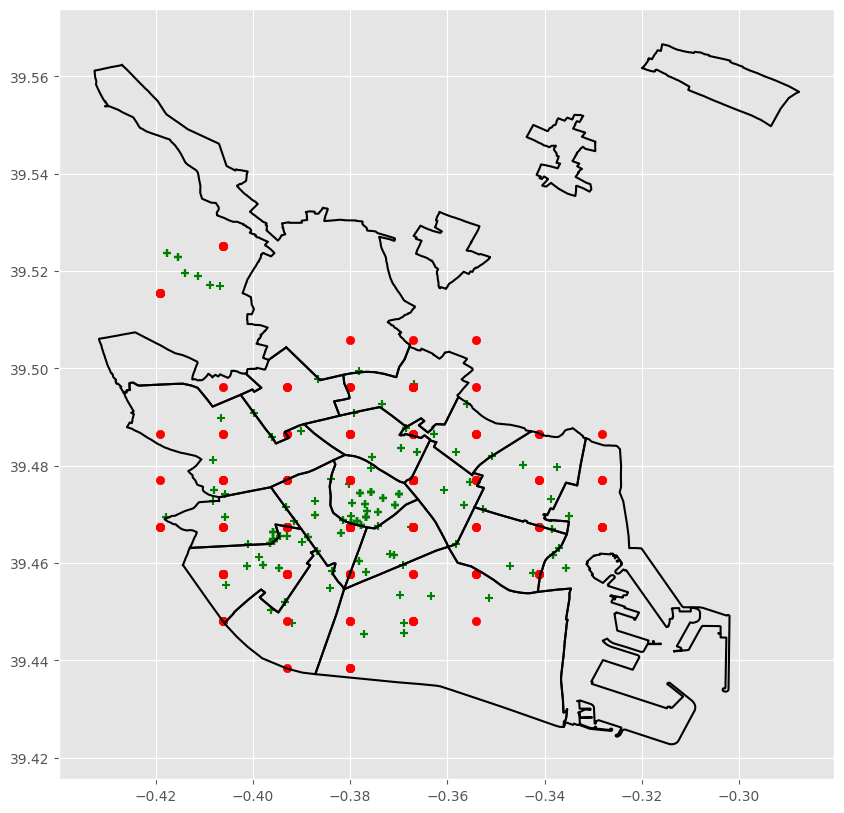

In [100]:
from shapely.geometry.polygon import Polygon
import geopandas as gpd
import json
import matplotlib.pyplot as plt

# poly = Polygon(dist)
# x,y = poly.exterior.xy

data = gpd.read_file("map.geojson")
  
with open('map2.json') as f:
    data2 = json.load(f)

features = data2['features']
coordinates = []
for feat in range(len(features)):
    coordinates.append(features[feat]['geometry']['coordinates'][0])

polygons = []
x = []
y = []

fig, ax = plt.subplots(figsize=(10, 10))
for coor in coordinates:
    poly = Polygon(coor)
    x_aux,y_aux = poly.exterior.xy
    # x.append(x_aux)
    # y.append(y_aux)
    plt.plot(x_aux, y_aux, c="black")

for cuad_num in cuadrantes_con_calles:
    calles_cuad = df_concentr_cuadrantes_1[df_concentr_cuadrantes_1["cuadrante"] == cuad_num]
    coor_y_lat = []
    coor_x_lon = []

    cuadrante = datos_contaminacion[datos_contaminacion['cuadrante'] == cuad_num]
    for row_cont in cuadrante.iterrows():
        limites_lon = [row_cont[1]["limite_lon_inf"], row_cont[1]["limite_lon_sup"]]
        limites_lat = [row_cont[1]["limite_lat_inf"], row_cont[1]["limite_lat_sup"]]

    for row_concent in calles_cuad.iterrows():
        coordenadas = row_concent[1]["Coordenadas"].split(",")
        c_latitud = float(coordenadas[0])      
        c_longitud = float(coordenadas[1])
        coor_y_lat.append(c_latitud)
        coor_x_lon.append(c_longitud)
        plt.scatter(coor_x_lon, coor_y_lat, c="green", marker="+")
        plt.scatter(limites_lon, limites_lat, c="red")


In [101]:
def draw_district_map(data):

    with open(data) as f:
        data2 = json.load(f)

    features = data2['features']
    coordinates = []
    for feat in range(len(features)):
        coordinates.append(features[feat]['geometry']['coordinates'][0])

    fig, ax = plt.subplots(figsize=(10, 10))
    for coor in coordinates:
        poly = Polygon(coor)
        x_aux,y_aux = poly.exterior.xy
        plt.plot(x_aux, y_aux, c="black")


In [102]:
calles_ej = df_concentr_cuadrantes_1[df_concentr_cuadrantes_1["cuadrante"] == 30]
calles_ej = list(calles_ej['PUNTOS DE MUESTREO'].values)

In [103]:
#DIBUJAR TODOS LOS CUADRANTES CON SUS CALLES SOBRE EL MAPA

# for cuad_num in cuadrantes_con_calles:
#     calles_cuad = df_concentr_cuadrantes_1[df_concentr_cuadrantes_1["cuadrante"] == cuad_num]
#     calles_ej = list(calles_cuad['PUNTOS DE MUESTREO'].values)
#     coor_y_lat = []
#     coor_x_lon = []

#     cuadrante = datos_contaminacion[datos_contaminacion['cuadrante'] == cuad_num]
#     for row_cont in cuadrante.iterrows():
#         limites_lon = [row_cont[1]["limite_lon_inf"], row_cont[1]["limite_lon_sup"]]
#         limites_lat = [row_cont[1]["limite_lat_inf"], row_cont[1]["limite_lat_sup"]]

#     for row_concent in calles_cuad.iterrows():
#         coordenadas = row_concent[1]["Coordenadas"].split(",")
#         c_latitud = float(coordenadas[0])      
#         c_longitud = float(coordenadas[1])
#         coor_y_lat.append(c_latitud)
#         coor_x_lon.append(c_longitud)
    
#     draw_district_map('map2.json')
#     plt.scatter(limites_lon, limites_lat, label="Cuadrante: "+str(cuad_num))
#     plt.scatter(coor_x_lon, coor_y_lat, label=calles_ej, marker="X")
#     plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05))


In [104]:
media_calles_cuadrantes = df_concentr_cuadrantes_1.groupby(by=["cuadrante"], as_index=False)["NO2_media"].mean()

In [105]:
df_concentr_cuadrantes_2 = df_concentr_cuadrantes_1.copy()
for i in range(media_calles_cuadrantes.shape[0]):
    df_concentr_cuadrantes_2.loc[df_concentr_cuadrantes_2["cuadrante"] == media_calles_cuadrantes["cuadrante"][i], "NO2_media_cuadrante"] = media_calles_cuadrantes["NO2_media"][i]
df_concentr_cuadrantes_2

,Número,PUNTOS DE MUESTREO,Coordenadas,NO2_media,cuadrante,NO2_media_cuadrante
0,1.0,Xátiva - San Vicente,"39.468167 , -0.379714",45.7800,30.0,38.365573
1,2.0,Plaza del Ayuntamiento,"39.469404 , -0.376665",34.6750,30.0,38.365573
2,3.0,Túnel plaza España,"39.460398 , -0.378253",70.3325,29.0,45.279000
3,4.0,Plaza de la Reina,"39.474550 , -0.375630",27.3850,30.0,38.365573
4,5.0,Plaza de Tetuán,"39.474265 , -0.369902",40.7825,30.0,38.365573
...,...,...,...,...,...,...
99,804.0,c/ El Clot (final calle),"39.52362, -0.4177",15.9325,8.0,23.814167
100,805.0,Plaza Comunidad Valenciana,"39.51952, -0.41394",31.5675,8.0,23.814167
101,806.0,c/ Major 63,"39.51896, -0.41121",26.5525,8.0,23.814167
102,807.0,c/ Tenor Alonso - c/ Sagrado Corazón,"39.51718, -0.4087",20.6800,8.0,23.814167


In [106]:
## Asociar los N02_reales a cada cuadrante del dataframe ["cuadrante", "NO2_media"]
no2_reales = datos_contaminacion[["cuadrante", "NOX_real"]]

In [107]:
media_calles_cuadrantes_2 = media_calles_cuadrantes.copy()
#media_calles_cuadrantes_2["NOX_real"] = no2_reales["NOX_real"][no2_reales["cuadrante"] == media_calles_cuadrantes_2["cuadrante"]]
data_corr= pd.merge(media_calles_cuadrantes_2, no2_reales)
data_corr

,cuadrante,NO2_media,NOX_real
0,3.0,42.677500,4.651676e+07
1,4.0,30.835000,8.678199e+06
2,5.0,33.110000,2.064951e+07
3,8.0,23.814167,0.000000e+00
4,10.0,50.476111,3.728877e+07
5,11.0,33.702000,4.594180e+07
6,12.0,45.755833,9.241547e+07
7,13.0,52.385000,6.528951e+07
8,14.0,51.335000,5.450929e+07
9,18.0,42.632500,4.481612e+07


In [125]:
#ESCALAR DATOS DE NOX_real rspecto a N02_media

from sklearn.preprocessing import MinMaxScaler

print("MAX VALUE: ", max(data_corr['NO2_media']))
print("MIN VALUE: ", min(data_corr['NO2_media']))

max_val = max(data_corr['NO2_media'])
min_val = min(data_corr['NO2_media'])
cuadrantes = data_corr['cuadrante'].values

scaler = MinMaxScaler(feature_range=(min_val, max_val))

normalized_data = scaler.fit_transform(data_corr[['NO2_media','NOX_real']])

normalized_df = pd.DataFrame(normalized_data, columns=data_corr[['NO2_media','NOX_real']].columns)
normalized_df['cuadrante'] = cuadrantes
normalized_df

MAX VALUE:  55.53333333333334
MIN VALUE:  21.9425


,NO2_media,NOX_real,cuadrante
0,42.677500,38.754270,3.0
1,30.835000,25.078916,4.0
2,33.110000,29.405506,5.0
3,23.814167,21.942500,8.0
4,50.476111,35.419154,10.0
5,33.702000,38.546471,11.0
6,45.755833,55.342669,12.0
7,52.385000,45.538991,13.0
8,51.335000,41.642875,14.0
9,42.632500,38.139637,18.0


In [109]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y análisis
# ==============================================================================
import statsmodels.api as sm
import pingouin as pg
from scipy import stats
from scipy.stats import pearsonr

# Configuración matplotlib
# ==============================================================================
plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

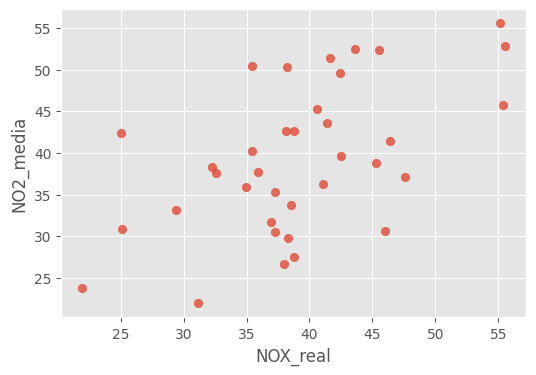

In [110]:
# Gráfico
# ==============================================================================
fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.scatter(x=normalized_df.NOX_real, y=normalized_df.NO2_media, alpha= 0.8)
ax.set_xlabel('NOX_real')
ax.set_ylabel('NO2_media');

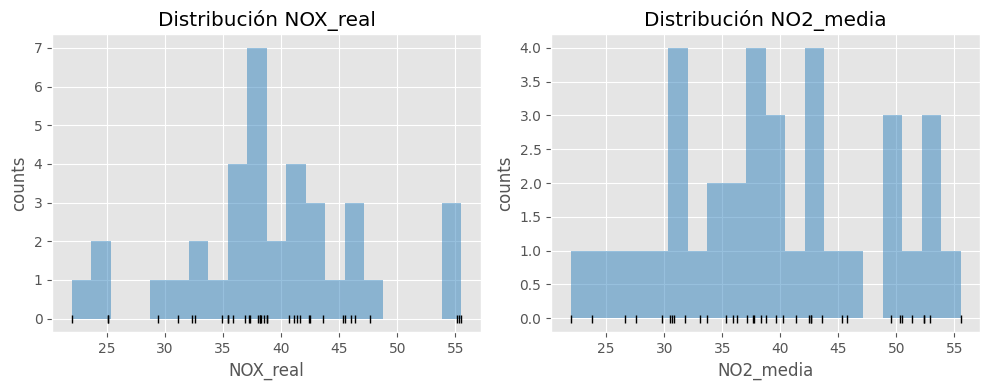

In [111]:
# Gráfico distribución variables
# ==============================================================================
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

axs[0].hist(x=normalized_df.NOX_real, bins=20, color="#3182bd", alpha=0.5)
axs[0].plot(normalized_df.NOX_real, np.full_like(normalized_df.NOX_real, -0.01), '|k', markeredgewidth=1)
axs[0].set_title('Distribución NOX_real')
axs[0].set_xlabel('NOX_real')
axs[0].set_ylabel('counts')

axs[1].hist(x=normalized_df.NO2_media, bins=20, color="#3182bd", alpha=0.5)
axs[1].plot(normalized_df.NO2_media, np.full_like(normalized_df.NO2_media, -0.01), '|k', markeredgewidth=1)
axs[1].set_title('Distribución NO2_media')
axs[1].set_xlabel('NO2_media')
axs[1].set_ylabel('counts')


plt.tight_layout();

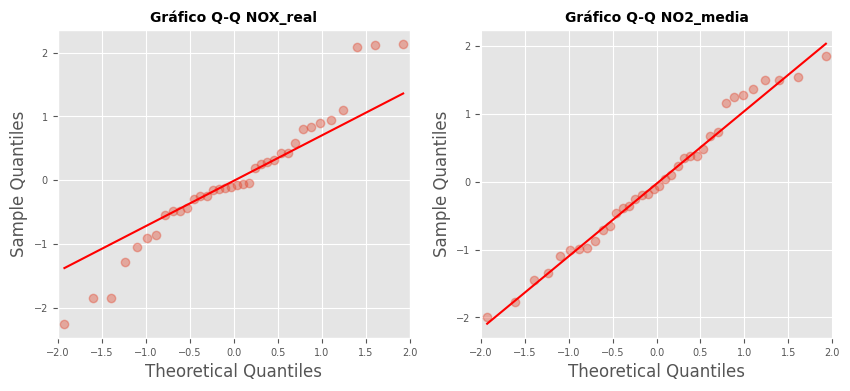

In [112]:
# Gráfico Q-Q
# ==============================================================================
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

sm.qqplot(
    normalized_df.NOX_real,
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = axs[0]
)
axs[0].set_title('Gráfico Q-Q NOX_real', fontsize = 10, fontweight = "bold")
axs[0].tick_params(labelsize = 7)

sm.qqplot(
    normalized_df.NO2_media,
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = axs[1]
)
axs[1].set_title('Gráfico Q-Q NO2_media', fontsize = 10, fontweight = "bold")
axs[1].tick_params(labelsize = 7)

In [113]:
# Normalidad de los residuos Shapiro-Wilk test
# ==============================================================================
shapiro_test = stats.shapiro(normalized_df.NOX_real)
print(f"Variable NOX_real: {shapiro_test}")
shapiro_test = stats.shapiro(normalized_df.NO2_media)
print(f"Variable NO2_media: {shapiro_test}")

Variable NOX_real: ShapiroResult(statistic=0.9645954966545105, pvalue=0.2966312766075134)
Variable NO2_media: ShapiroResult(statistic=0.9737961888313293, pvalue=0.5379015803337097)


In [114]:
# Normalidad de los residuos D'Agostino's K-squared test
# ==============================================================================
k2, p_value = stats.normaltest(normalized_df.NOX_real)
print(f"Variable NOX_real: Estadítico = {k2}, p-value = {p_value}")
k2, p_value = stats.normaltest(normalized_df.NO2_media)
print(f"Variable NO2_media: Estadítico = {k2}, p-value = {p_value}")

Variable NOX_real: Estadítico = 0.7956551031605414, p-value = 0.6717778647049428
Variable NO2_media: Estadítico = 1.6439210392022214, p-value = 0.4395690254912391


In [115]:
# Cálculo de correlación con Pandas
# ==============================================================================
print('Correlación Pearson: ', normalized_df['NOX_real'].corr(normalized_df['NO2_media'], method='pearson'))
print('Correlación spearman: ', normalized_df['NOX_real'].corr(normalized_df['NO2_media'], method='spearman'))
print('Correlación kendall: ', normalized_df['NOX_real'].corr(normalized_df['NO2_media'], method='kendall'))

Correlación Pearson:  0.5516466618196212
Correlación spearman:  0.5093951093951095
Correlación kendall:  0.3587301587301588


In [116]:
# Cálculo de correlación y significancia con Scipy
# ==============================================================================
r, p = stats.pearsonr( normalized_df['NOX_real'],normalized_df['NO2_media'])
print(f"Correlación Pearson: r={r}, p-value={p}")

r, p = stats.spearmanr( normalized_df['NOX_real'], normalized_df['NO2_media'])
print(f"Correlación Spearman: r={r}, p-value={p}")

r, p = stats.kendalltau( normalized_df['NOX_real'], normalized_df['NO2_media'])
print(f"Correlación Pearson: r={r}, p-value={p}")

Correlación Pearson: r=0.551646661819621, p-value=0.00048759067644394734
Correlación Spearman: r=0.5093951093951095, p-value=0.0015082451039584673
Correlación Pearson: r=0.3587301587301588, p-value=0.0020816979767858492


In [117]:
# Cálculo de correlación, significancia e intervalos con pingouin
# ==============================================================================
display(pg.corr(normalized_df['NOX_real'], normalized_df['NO2_media'], method='pearson'))
display(pg.corr(normalized_df['NOX_real'], normalized_df['NO2_media'], method='spearman'))
display(pg.corr(normalized_df['NOX_real'], normalized_df['NO2_media'], method='kendall'))

,n,r,CI95%,p-val,BF10,power
pearson,36,0.551647,"[0.27, 0.75]",0.000488,71.519,0.950273


,n,r,CI95%,p-val,power
spearman,36,0.509395,"[0.22, 0.72]",0.001508,0.904237


,n,r,CI95%,p-val,power
kendall,36,0.35873,"[0.03, 0.61]",0.002082,0.58803


Jackknife correlation

In [118]:
a = normalized_df['NOX_real']
b = normalized_df['NO2_media']

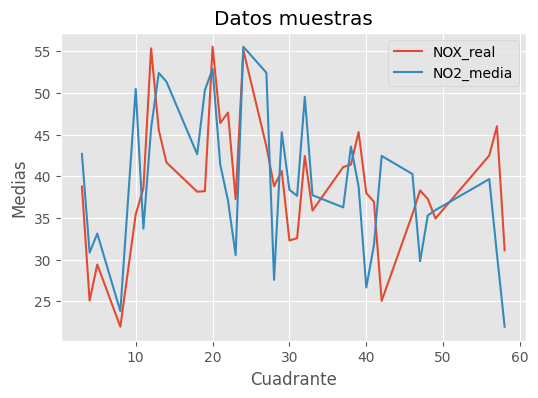

In [119]:
# Gráfico
# ==============================================================================
fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.plot(normalized_df['cuadrante'],a, label='NOX_real')
ax.plot(normalized_df['cuadrante'],b, label='NO2_media')
ax.set_xlabel('Cuadrante')
ax.set_ylabel('Medias')
ax.set_title('Datos muestras')
ax.legend();

In [120]:
# Correlación con outlier
r, p = stats.pearsonr(a, b)
print(f"Correlación Pearson con outlier: r={r}, p-value={p}")

Correlación Pearson con outlier: r=0.551646661819621, p-value=0.00048759067644394734


Matriz de correlaciones


In [121]:
# Variables numéricas
datos = normalized_df.select_dtypes(include=['float64', 'int'])
# Matriz de correlación
# ==============================================================================
datos = datos[['NO2_media','NOX_real']]
corr_matrix = datos.corr(method='pearson')
corr_matrix

,NO2_media,NOX_real
NO2_media,1.000000,0.551647
NOX_real,0.551647,1.000000


In [122]:
def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy.
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)

tidy_corr_matrix(corr_matrix).head(10)

,variable_1,variable_2,r,abs_r
1,NO2_media,NOX_real,0.551647,0.551647
2,NOX_real,NO2_media,0.551647,0.551647


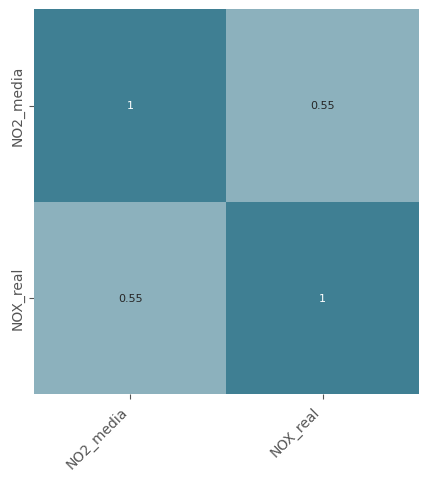

In [123]:
# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)